In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fire.csv')

In [3]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


__SETTING THRESHOLD FOR CORRELATION__

In [5]:
def correlation(dataset,threshold):
    sett=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                sett.add(colname)
    return sett


In [6]:
features=(correlation(df,0.85))
list(features)
#Note that 'FWI' is the output

['DC', 'FWI', 'BUI']

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df.drop(['BUI','DC'],axis=1,inplace=True)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [10]:
input=df.drop(['FWI'],axis=1)
target=df['FWI']

__TRAIN TEST SPLIT__

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

__SCALING THE VALUES__

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
X_train_scaled.shape,X_test_scaled.shape

((194, 9), (49, 9))

__PLOATING BOX PLOT TO STUDY THE OUTLIERS__

<Axes: >

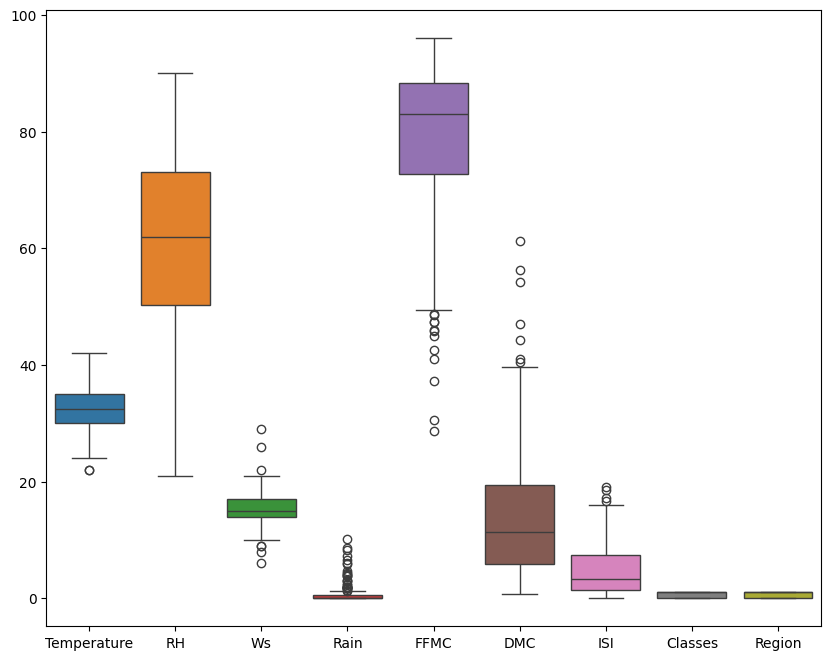

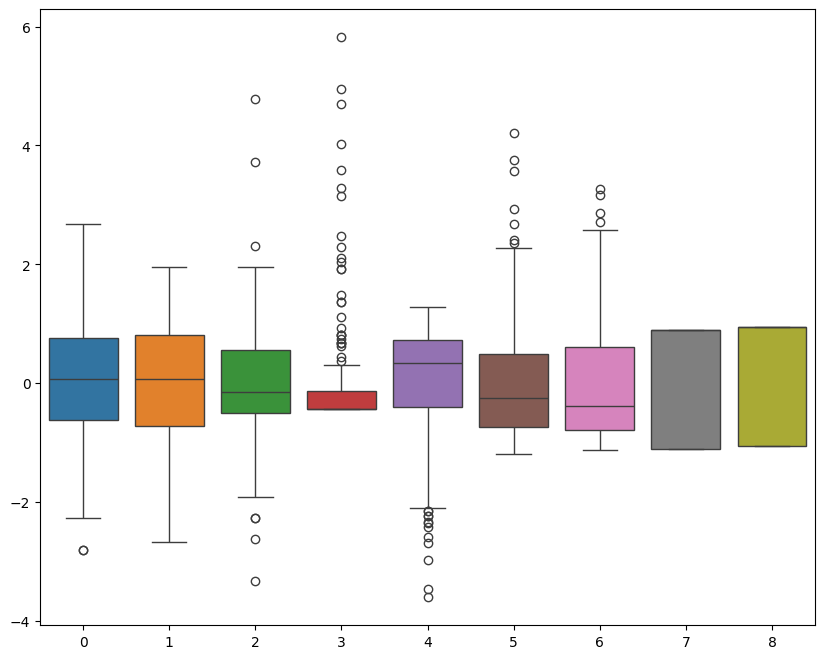

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(X_train)
plt.figure(figsize=(10,8))
sns.boxplot(X_train_scaled)

__MODEL TRAINING__

__LINEAR REGRESSION__

In [17]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
score=regression.score(X_train_scaled,y_train)
print(score)

0.9704508916078691


__RIDGE REGRESSION__

In [18]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
score=ridge.score(X_train_scaled,y_train)
print(score)

0.9704083416095205


__LASSO REGRESSION__

In [19]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
score=lasso.score(X_train_scaled,y_train)
print(score)

0.9414273905130576


__ELASTICNET REGRESSION__

In [20]:
from sklearn.linear_model import ElasticNet

en=ElasticNet()
en.fit(X_train_scaled,y_train)
score=en.score(X_train_scaled,y_train)
print(score)

0.8866293717428451


__LASSOCV REGRESSION__

In [21]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
score=lassocv.score(X_train_scaled,y_train)
print(score)


0.970308473420799


In [22]:
lassocv.alpha_

0.019460052219417188

In [23]:
lassocv.alphas_

array([6.83279745, 6.37228977, 5.94281877, 5.54229267, 5.1687607 ,
       4.82040352, 4.49552446, 4.19254116, 3.90997792, 3.64645849,
       3.40069939, 3.17150363, 2.9577549 , 2.75841212, 2.57250438,
       2.39912619, 2.23743312, 2.08663761, 1.94600522, 1.81485098,
       1.6925361 , 1.57846483, 1.47208159, 1.37286821, 1.28034149,
       1.19405076, 1.11357573, 1.03852446, 0.96853138, 0.90325561,
       0.84237921, 0.78560567, 0.73265847, 0.68327975, 0.63722898,
       0.59428188, 0.55422927, 0.51687607, 0.48204035, 0.44955245,
       0.41925412, 0.39099779, 0.36464585, 0.34006994, 0.31715036,
       0.29577549, 0.27584121, 0.25725044, 0.23991262, 0.22374331,
       0.20866376, 0.19460052, 0.1814851 , 0.16925361, 0.15784648,
       0.14720816, 0.13728682, 0.12803415, 0.11940508, 0.11135757,
       0.10385245, 0.09685314, 0.09032556, 0.08423792, 0.07856057,
       0.07326585, 0.06832797, 0.0637229 , 0.05942819, 0.05542293,
       0.05168761, 0.04820404, 0.04495524, 0.04192541, 0.03909

__RIDGECV REGRESSION__

In [24]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
score=ridgecv.score(X_train_scaled,y_train)
print(score)

0.9704083416095205


In [25]:
ridgecv.alpha_

1.0

In [26]:
ridgecv.alphas

(0.1, 1.0, 10.0)

__ELASTICNETCV REGRESSION__

In [27]:
from sklearn.linear_model import ElasticNetCV

encv=ElasticNetCV(cv=5)
encv.fit(X_train_scaled,y_train)
score=encv.score(X_train_scaled,y_train)
print(score)

0.9703402494748173


__TESTING THE MODEL__

In [28]:
encv.score(X_test_scaled,y_test)

0.9802678818901871

__PICKLEING THE MODEL FOR DEPLOYMENT__

In [29]:
scaler

StandardScaler()

In [30]:
ridge

Ridge()

In [31]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))